# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Shintyadhita Wirawan Putri
- **Email:** shintyadhita.wputri@gmail.com
- **ID Dicoding:** shintyadhita

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Bagaimana perbedaan tren penyewaan sepeda bagi penyewa casual pada setiap musimnya?
- Bagaimana perbedaan jumlah penyewa antara Peak Hours dan Off-Peak Hours?

## Import Semua Packages/Library yang Digunakan

In [26]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [27]:
rent_file_path = '/content/drive/MyDrive/submission/data/hour.csv'

rent_df = pd.read_csv(rent_file_path)
rent_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [28]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [29]:
print("Jumlah duplikasi hour: ", rent_df.duplicated().sum())

Jumlah duplikasi hour:  0


**Penjelasan informasi dari hour_df:**
- Terdapat ketidaksesuaian tipe data untuk kolom 'dteday' yang seharusnya menggunakan
tipe data datetime, bukan object.
- Perlu dilakukan konversi nilai yang semula direpresentasikan menggunakan angka (int) menjadi value sebenarnya (string) dari beberapa kolom untuk mempermudah proses analisis data.
- Tidak terdapat data yang terduplikat dan missing value.

### Cleaning Data

In [30]:
#Mengubah tipe data kolom dteday.
datetime_columns = ["dteday"]

for column in datetime_columns:
  rent_df[column] = pd.to_datetime(rent_df[column])

#Mengubah nama kolom pada rent_df.
rent_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'cnt':'countrent'
    }, inplace=True)

rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  countrent   17379 non-

In [31]:
# Mengonversi nilai dari kolom season
rent_df.season.replace((1,2,3,4),
                    ('Spring','Summer','Fall','Winter'),
                    inplace=True)

# Mengonversi nilai dari kolom weathersit
rent_df.weathersit.replace((1,2,3,4),
                        ('Clear','Misty','Light Rain/Snow','Severe Weather'),
                        inplace=True)

In [32]:
# Penambahan kategori hours
peak_hours = [7, 8, 9, 16, 17, 18, 19]
rent_df['hourcategory'] = rent_df['hour'].apply(lambda x: 'Peak Hour' if x in peak_hours else 'Off-Peak Hour')

In [33]:
# Menambahkan datetime
rent_df['datetime'] = rent_df['dateday'] + pd.to_timedelta(rent_df['hour'], unit='h')

In [34]:
# Menampilkan hasil cleaning
rent_df.head(10)

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,countrent,hourcategory,datetime
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16,Off-Peak Hour,2011-01-01 00:00:00
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40,Off-Peak Hour,2011-01-01 01:00:00
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32,Off-Peak Hour,2011-01-01 02:00:00
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13,Off-Peak Hour,2011-01-01 03:00:00
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1,Off-Peak Hour,2011-01-01 04:00:00
5,6,2011-01-01,Spring,0,1,5,0,6,0,Misty,0.24,0.2576,0.75,0.0896,0,1,1,Off-Peak Hour,2011-01-01 05:00:00
6,7,2011-01-01,Spring,0,1,6,0,6,0,Clear,0.22,0.2727,0.80,0.0000,2,0,2,Off-Peak Hour,2011-01-01 06:00:00
7,8,2011-01-01,Spring,0,1,7,0,6,0,Clear,0.20,0.2576,0.86,0.0000,1,2,3,Peak Hour,2011-01-01 07:00:00
8,9,2011-01-01,Spring,0,1,8,0,6,0,Clear,0.24,0.2879,0.75,0.0000,1,7,8,Peak Hour,2011-01-01 08:00:00
9,10,2011-01-01,Spring,0,1,9,0,6,0,Clear,0.32,0.3485,0.76,0.0000,8,6,14,Peak Hour,2011-01-01 09:00:00


## Exploratory Data Analysis (EDA)

### Explore ...

In [35]:
# Perbedaan jumlah penyewaan sepeda antar cuaca
weather_df = rent_df.groupby(by='weathersit').agg({
    'countrent': ['mean', 'sum']
})

# Mengganti nama kolom
weather_df.columns = ['mean_rent', 'total_rent']

# Mengurutkan berdasarkan total penyewaan terbanyak
sorted_weather_df = weather_df.sort_values(by='total_rent', ascending=False).reset_index()

# Menampilkan data penyewaan per musim
print(sorted_weather_df)

        weathersit   mean_rent  total_rent
0            Clear  204.869272     2338173
1            Misty  175.165493      795952
2  Light Rain/Snow  111.579281      158331
3   Severe Weather   74.333333         223


In [36]:
# Perbedaan tren penyewaan sepeda antar musim
season_df = rent_df.groupby(by='season').agg({
    'casual': 'sum',
    'countrent': ['mean', 'sum']
})

# Mengganti nama kolom
season_df.columns = ['total_casual_rent', 'mean_rent', 'total_rent']

# Mengurutkan berdasarkan total penyewaan terbanyak
sorted_season_df = season_df.sort_values(by='total_casual_rent', ascending=False).reset_index()

# Menampilkan data penyewaan per musim
print(sorted_season_df)

   season  total_casual_rent   mean_rent  total_rent
0    Fall             226091  236.016237     1061129
1  Summer             203522  208.344069      918589
2  Winter             129782  198.868856      841613
3  Spring              60622  111.114569      471348


In [37]:
# Perbedaan jumlah penyewa antar waktu
hour_df = rent_df.groupby(by="hourcategory").countrent.sum().sort_values(ascending=False).reset_index()
print(hour_df)

    hourcategory  countrent
0      Peak Hour    1675779
1  Off-Peak Hour    1616900


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

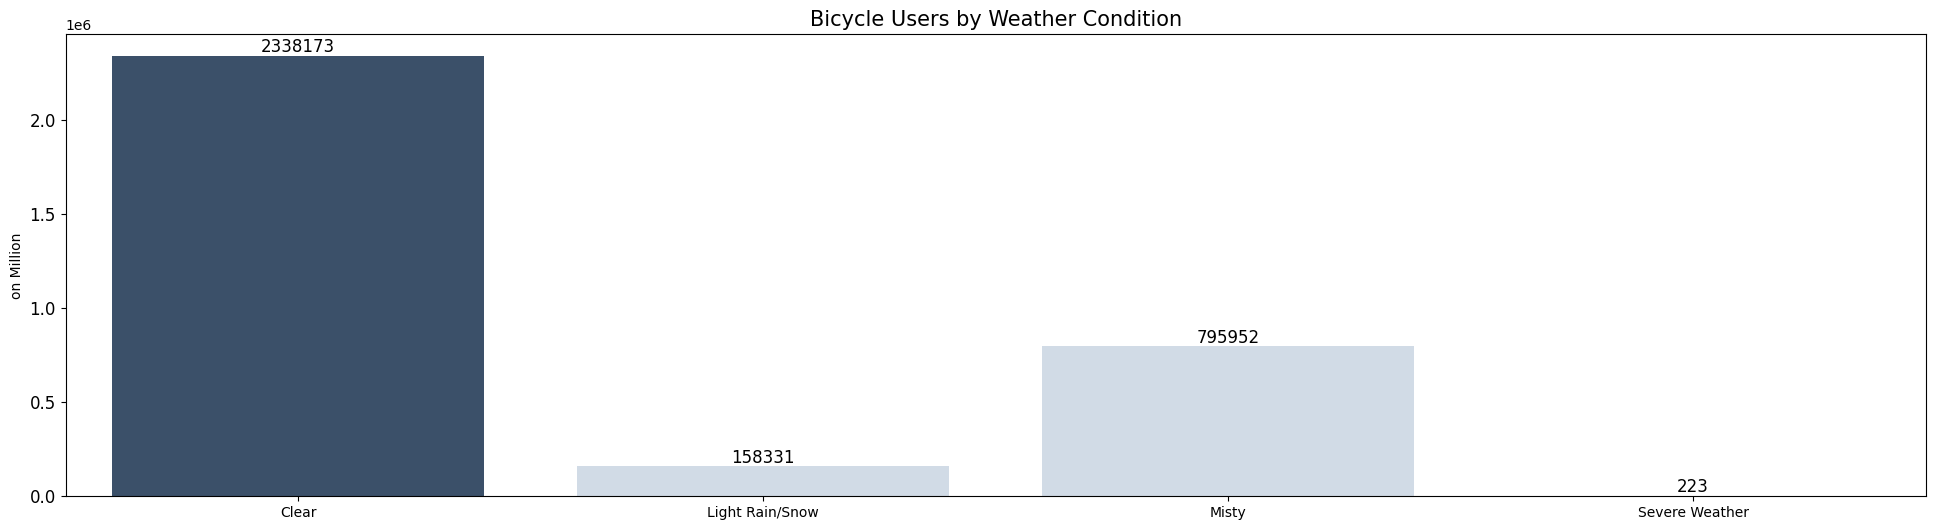

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
colors = ["#335071", "#cedbe9", "#cedbe9", "#cedbe9"]

bars = sns.barplot(x="weathersit", y="total_rent", data=weather_df.head(), palette=colors, hue="weathersit", ax=ax)
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{height:.0f}',
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

ax.set_ylabel("on Million")
ax.set_xlabel(None)
ax.set_title("Bicycle Users by Weather Condition", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.show()

### Pertanyaan 2: Bagaimana perbedaan tren penyewaan sepeda bagi penyewa casual pada setiap musimnya?

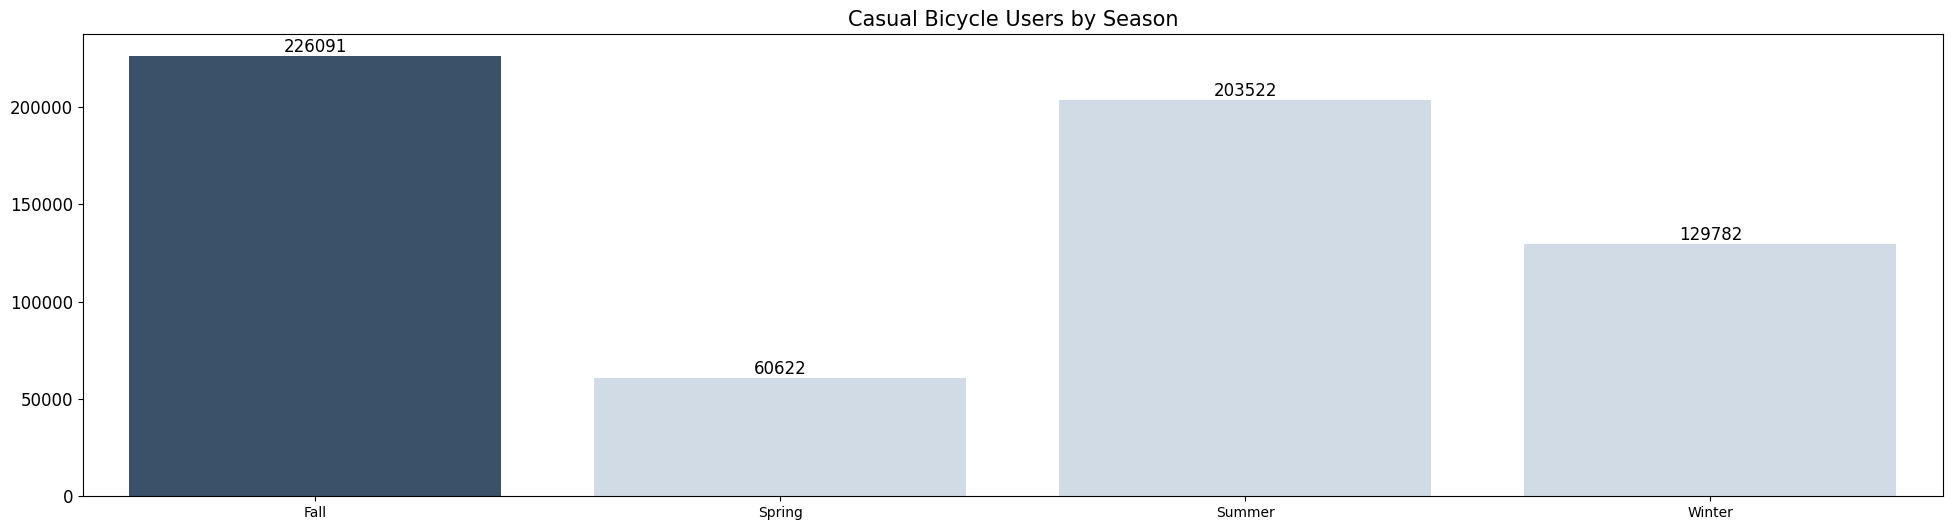

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
colors = ["#335071", "#cedbe9", "#cedbe9", "#cedbe9"]

bars = sns.barplot(x="season", y="total_casual_rent", data=season_df.head(), palette=colors, hue="season", ax=ax)
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{height:.0f}',
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Casual Bicycle Users by Season", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.show()

### Pertanyaan 3: Bagaimana perbedaan jumlah penyewa antara Peak Hours dan Off-Peak Hours?

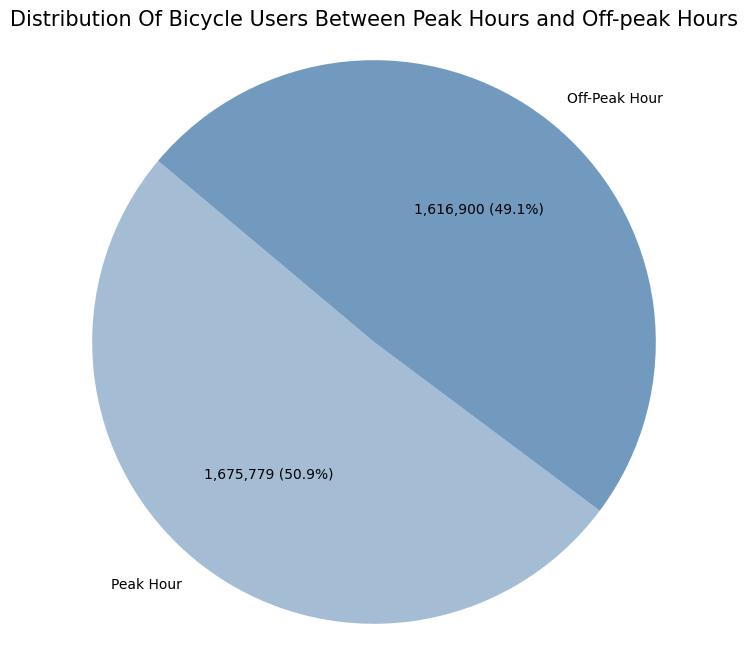

In [40]:
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute:,} ({pct:.1f}%)'

plt.figure(figsize=(8, 8))
plt.pie(
    hour_df['countrent'],
    labels=hour_df['hourcategory'],
    autopct=lambda pct: func(pct, hour_df['countrent']),
    startangle=140,
    colors=['#a4bdd5','#7299be'])
plt.title("Distribution Of Bicycle Users Between Peak Hours and Off-peak Hours", loc="center", fontsize=15)
plt.axis('equal')
plt.show()

### RFM

In [41]:
rfm_df = rent_df.groupby(by="hour", as_index=False).agg({
    'datetime': 'max',
    'countrent': ['sum', 'count']
})

rfm_df.columns = ['hour', 'last_rental', 'monetary', 'frequency']

# Menghitung waktu rental_time untuk tiap jamnya dengan latest_timestamp
latest_timestamp = rfm_df['last_rental'].max()
rfm_df['recency'] = (latest_timestamp - rfm_df['last_rental']).dt.total_seconds() / 3600

rfm_df.drop("last_rental", axis=1, inplace=True)
rfm_df.head()

,hour,monetary,frequency,recency
0,0,39130,726,23.0
1,1,24164,724,22.0
2,2,16352,715,21.0
3,3,8174,697,20.0
4,4,4428,697,19.0


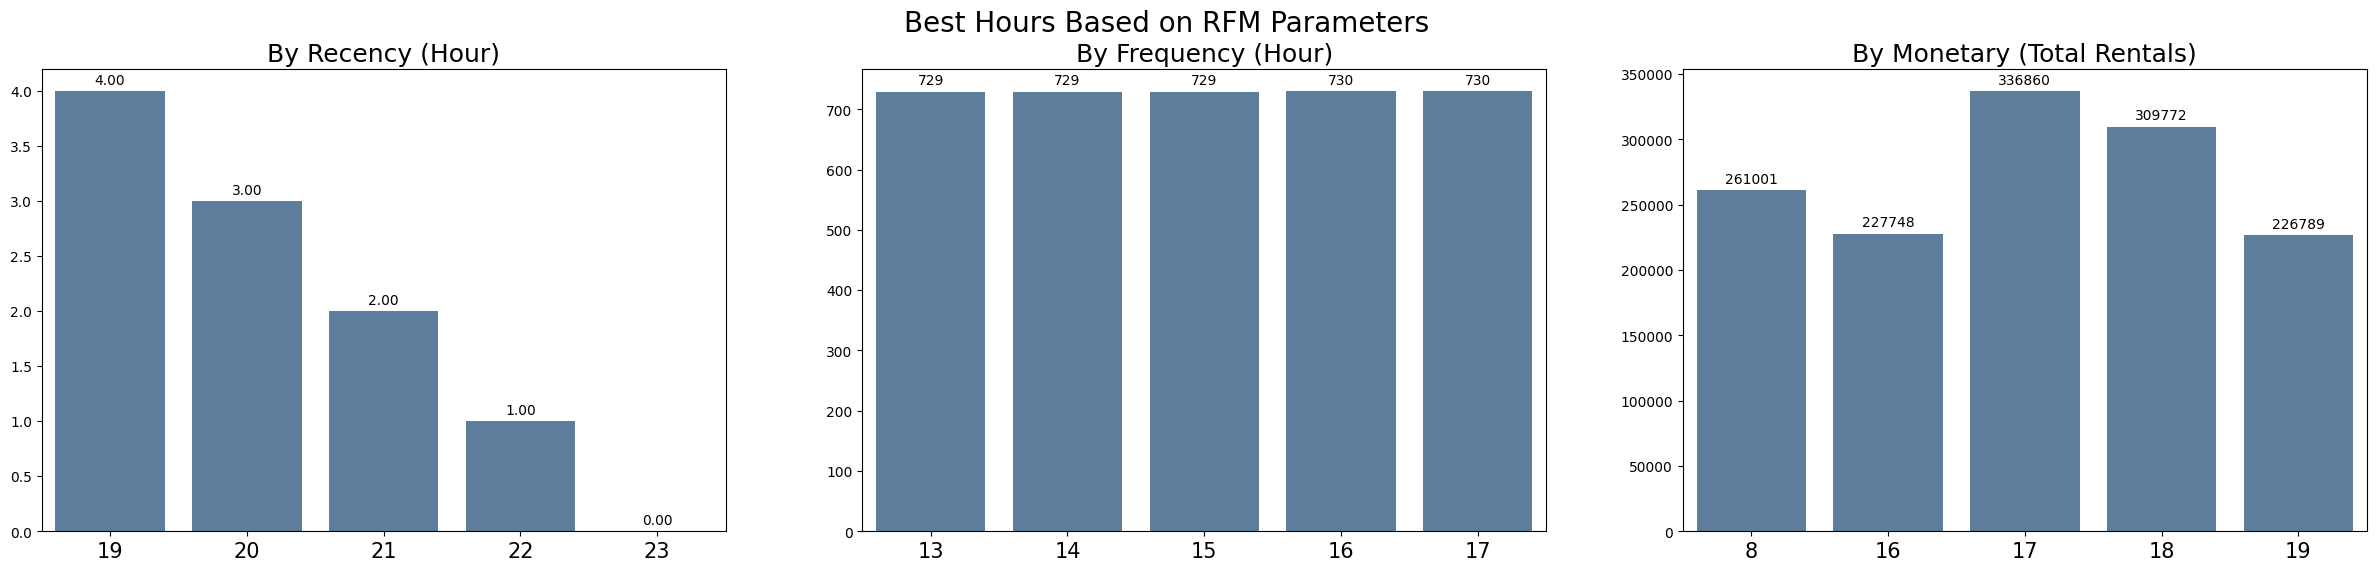

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#517da6", "#517da6", "#517da6", "#517da6", "#517da6"]

sns.barplot(y="recency", x="hour", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="hour", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (Hour)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.2f', label_type='edge', padding=3)

sns.barplot(y="frequency", x="hour", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="hour", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency (Hour)", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', label_type='edge', padding=3)

sns.barplot(y="monetary", x="hour", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="hour", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary (Total Rentals)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
for container in ax[2].containers:
    ax[2].bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.suptitle("Best Hours Based on RFM Parameters", fontsize=20)
plt.show()

In [43]:
# Mengurutkan berdasarkan recency, frequency, & monetary score
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,hour,monetary,frequency,recency,r_rank,f_rank,m_rank
0,0,39130,726,23.0,1.0,7.0,6.0
1,1,24164,724,22.0,2.0,5.0,5.0
2,2,16352,715,21.0,3.0,3.0,4.0
3,3,8174,697,20.0,4.0,1.5,2.0
4,4,4428,697,19.0,5.0,1.5,1.0


In [44]:
# Menormalisasikan rank
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,hour,monetary,frequency,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0,39130,726,23.0,4.166667,29.787234,25.000000
1,1,24164,724,22.0,8.333333,21.276596,20.833333
2,2,16352,715,21.0,12.500000,12.765957,16.666667
3,3,8174,697,20.0,16.666667,6.382979,8.333333
4,4,4428,697,19.0,20.833333,6.382979,4.166667


In [45]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['hour', 'RFM_score']].head()

,hour,RFM_score
0,0,1.16
1,1,0.95
2,2,0.75
3,3,0.45
4,4,0.36


In [46]:
# Segmentasi berdasarkan RFM_Score
rfm_df["hoursegment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top hours", np.where(
        rfm_df['RFM_score'] > 4, "High value hours", np.where(
            rfm_df['RFM_score'] > 3, "Medium value hours", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value hours', 'Lost hours'))))
rfm_df[['hour', 'RFM_score', 'hoursegment']].head(24)

,hour,RFM_score,hoursegment
0,0,1.16,Lost hours
1,1,0.95,Lost hours
2,2,0.75,Lost hours
3,3,0.45,Lost hours
4,4,0.36,Lost hours
5,5,0.78,Lost hours
6,6,1.41,Lost hours
7,7,2.39,Low value hours
8,8,3.49,Medium value hours
9,9,2.57,Low value hours


In [47]:
hour_segment_df = rfm_df.groupby(by="hoursegment", as_index=False).hour.nunique()
hour_segment_df.rename(columns={'hour': 'total'}, inplace=True)
print(hour_segment_df)

          hoursegment  total
0    High value hours      2
1          Lost hours      7
2     Low value hours      7
3  Medium value hours      7
4           Top hours      1


In [48]:
hour_segment_df['hoursegment'] = pd.Categorical(hour_segment_df['hoursegment'], ["Lost hours", "Low value hours", "Medium value hours", "High value hours", "Top hours"])

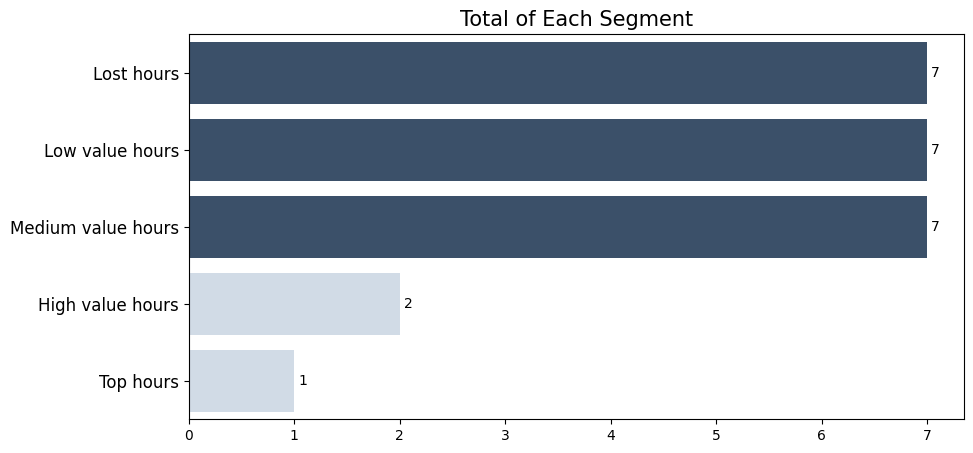

In [49]:
plt.figure(figsize=(10, 5))
colors_ = ["#335071", "#335071", "#335071", "#cedbe9", "#cedbe9"]

ax = sns.barplot(
    x="total",
    y="hoursegment",
    data=hour_segment_df.sort_values(by="total", ascending=False),
    palette=colors_,
    hue="hoursegment"
)

plt.title("Total of Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()

## Conclusion

- Berdasarkan grafik, cuaca "Clear" memiliki jumlah pengguna sepeda lebih banyak dengan total 238,173. Kondisi cuaca "Misty" juga cukup banyak digunakan dengan total 79,952 pengguna, sementara kondisi "Severe Weather" memiliki jumlah pengguna paling sedikit yaitu hanya 223.
- Berdasarkan grafik, musim "Fall" memiliki jumlah pengguna sepeda casual lebih banyak dengan total 226,091. Lalu diikuti musim "Summer" dengan total 203,522 pengguna. Musim "Spring" memiliki jumlah pengguna paling sedikit yaitu 60,622.
- Berdasarkan grafik, waktu "Peak Hour" memiliki jumlah pengguna lebih banyak dengan persentase 50.9% (1,675,779 pengguna) dibandingkan "Off-peak Hour" yang memiliki persentase 49.1% (1,616,900 pengguna).
- RFM Analysis:
1.   Recency: Berdasarkan grafik, pengguna lebih sering menyewa sepeda pada pukul 19:00, dengan jumlah yang paling sedikit pada pukul 23:00.
2.   Frequency: Grafik menunjukkan bahwa jam-jam dengan frekuensi penggunaan sepeda tertinggi adalah pukul 13:00, 14:00, 15:00, 16:00, dan 17:00, dengan semua jam tersebut memiliki tingkat frekuensi yang hampir sama.
3. Monetary: Berdasarkan grafik, jam dengan total penyewaan tertinggi adalah pukul 17:00 dengan total penyewaan sekitar 305,564, diikuti oleh pukul 18:00 dengan total 273,784.
- Berdasarkan grafik "Total of Each Segment", terdapat 7 jam yang dikategorikan sebagai "Lost Hours", "Low Value Hours", dan "Medium Value Hours", menunjukkan bahwa sebagian besar jam memiliki nilai kontribusi rendah hingga sedang. Hanya ada 2 jam yang termasuk "High Value Hours" dan 1 jam yang masuk kategori "Top Hours", yang menunjukkan nilai kontribusi tertinggi. Hal ini berarti terdapat banyak jam yang kurang peminat dalam menggunakan sepeda *sharing*, sementara hanya sedikit jam yang sangat produktif.

In [50]:
rent_df.to_csv("/content/drive/MyDrive/submission/all_data.csv", index=False)